In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

import random
import math
sns.set()

<div style="background-color:orange; padding:30px; text-align: center;">
    <h1> Bright spots </h1>
    <h2> (most likely mineral particles)
<div>

## 1. brights spots - sphericity

In [117]:
bright_spots = pd.read_excel('C:/Users/hamro/Desktop/finished_projects/venus_project/correct_data/BrightSpots_STD statistika_22022022.xlsx')

In [118]:
bright_spots.head()

,Volume3d (µm^3),BaryCenterX (µm),BaryCenterY (µm),BaryCenterZ (µm),Anisotropy,Elongation,Flatness,EigenVal1,EigenVal2,EigenVal3,...,BinMom2y (µm^2),BinMom2z (µm^2),BinMomxy (µm^2),BinMomxz (µm^2),BinMomyz (µm^2),VoxelFaceArea,BorderVoxelCount,GreyMass (µm^3),index,Materials
0,434555.6,26860.7,31310.7,-39614.1,0.817912,6.694580e-01,0.271993,0.000871,5.834160e-04,1.586850e-04,...,268.930,717.144,-8.964320e+01,179.28600,179.286,0.045897,0,434555.6,1,Quartz_SuperHight
1,434555.6,27689.2,29109.4,-39164.4,0.577046,9.017300e-01,0.469047,0.000607,5.476590e-04,2.568780e-04,...,358.573,515.447,-1.120540e+02,22.41080,112.054,0.043029,0,434555.6,2,NaN
2,54319.4,26434.7,27911.7,-36773.7,-1.000000,-1.000000e+00,-1.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000,0.000,0.000000e+00,0.00000,0.000,0.008606,0,54319.4,3,NaN
3,162958.3,28858.5,29010.0,-36508.6,1.000000,7.926360e-11,1.000000,0.000956,7.579120e-14,7.579120e-14,...,0.000,956.192,7.579120e-08,0.00000,0.000,0.020080,0,162958.3,4,NaN
4,1140710.0,25834.1,27071.3,-36001.8,0.823143,7.974890e-01,0.221767,0.001708,1.361990e-03,3.020450e-04,...,665.922,1567.280,-4.928220e+02,-7.65963,-300.595,0.088926,0,1140710.0,5,NaN


In [119]:
bright = bright_spots.copy() 

In [120]:
bright.drop(['EigenVal1', 'EigenVal2', 'EigenVal3', 'EigenVec1X', 'EigenVec1Y',
       'EigenVec1Z', 'EigenVec2X', 'EigenVec2Y', 'EigenVec2Z', 'EigenVec3X',
       'EigenVec3Y', 'EigenVec3Z', 'ExtentMin1 (µm) ', 'ExtentMin2 (µm) ',
       'ExtentMin3 (µm) ', 'ExtentMax1 (µm) ', 'ExtentMax2 (µm) ',
       'ExtentMax3 (µm) ', 'BinMom2x (µm^2) ', 'BinMom2y (µm^2) ',
       'BinMom2z (µm^2) ', 'BinMomxy (µm^2) ', 'BinMomxz (µm^2) ',
       'BinMomyz (µm^2) ','BorderVoxelCount', 'Materials', 'index', 'GreyMass (µm^3) '], axis=1, inplace=True)

In [121]:
bright.drop_duplicates(inplace=True)

### The total number of all bright spots is 1115 

In [122]:
bright.describe()

,Volume3d (µm^3),BaryCenterX (µm),BaryCenterY (µm),BaryCenterZ (µm),Anisotropy,Elongation,Flatness,VoxelFaceArea
count,1.115000e+03,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,1.651993e+05,25100.282852,22522.127516,32095.670650,-0.107548,-0.402811,-0.650822,0.018050
std,3.845586e+05,5325.198451,8784.160742,23910.563417,0.966403,0.678350,0.579768,0.026247
min,5.431940e+04,8899.930000,1628.500000,-39614.100000,-1.000000,-1.000000,-1.000000,0.008606
25%,5.431940e+04,21615.450000,16171.400000,14154.700000,-1.000000,-1.000000,-1.000000,0.008606
50%,5.431940e+04,25510.600000,22420.300000,35145.200000,-1.000000,-1.000000,-1.000000,0.008606
75%,1.629583e+05,28934.200000,28510.100000,52705.200000,0.998359,0.184474,0.000000,0.020080
max,7.224490e+06,37114.600000,44386.100000,71218.300000,1.000000,0.999999,1.000000,0.473316


In [123]:
bright.columns

Index(['Volume3d (µm^3) ', 'BaryCenterX (µm) ', 'BaryCenterY (µm) ',
       'BaryCenterZ (µm) ', 'Anisotropy', 'Elongation', 'Flatness',
       'VoxelFaceArea'],
      dtype='object')

In [124]:
bright.shape

(1115, 8)

In [125]:
bright.columns

Index(['Volume3d (µm^3) ', 'BaryCenterX (µm) ', 'BaryCenterY (µm) ',
       'BaryCenterZ (µm) ', 'Anisotropy', 'Elongation', 'Flatness',
       'VoxelFaceArea'],
      dtype='object')

## removing erroneous records containing -1 in features (anisotropy, elongation, flatness)

In [126]:
bright = bright.drop(bright.index[bright['Anisotropy'] == -1], axis=0)

In [127]:
bright = bright.drop(bright.index[bright['Flatness'] == - 1], axis=0)

In [128]:
bright.shape

(312, 8)

### spatial distribution of bright spots (volume is exaggarated for purposes of visualization)

In [129]:
import plotly.express as px

fig= px.scatter_3d(bright, x='BaryCenterX (µm) ', y='BaryCenterY (µm) ', z='BaryCenterZ (µm) ',
              size='Volume3d (µm^3) ')

fig.show()

In [130]:
bright.sort_values(by='Volume3d (µm^3) ', inplace=True, ascending=False)

In [131]:
bright.head()


,Volume3d (µm^3),BaryCenterX (µm),BaryCenterY (µm),BaryCenterZ (µm),Anisotropy,Elongation,Flatness,VoxelFaceArea
667,7224490.0,22050.3,25717.7,43257.80,0.974847,0.026112,0.963270,0.473316
204,5431940.0,31646.6,11820.6,9863.01,0.894271,0.360805,0.293036,0.304069
932,4182600.0,27747.9,29361.7,57177.90,0.982126,0.782647,0.022838,0.309806
69,3204850.0,22236.0,28335.4,-4544.63,0.563716,0.898917,0.485344,0.172115
478,2824610.0,24029.8,26138.3,29441.10,0.984450,0.044017,0.353264,0.200801


In [132]:
bright.isnull().sum()

Volume3d (µm^3)      0
BaryCenterX (µm)     0
BaryCenterY (µm)     0
BaryCenterZ (µm)     0
Anisotropy           0
Elongation           0
Flatness             0
VoxelFaceArea        0
dtype: int64

In [133]:
bright.isnull().sum().sum()

0

In [134]:
bright.dtypes

Volume3d (µm^3)      float64
BaryCenterX (µm)     float64
BaryCenterY (µm)     float64
BaryCenterZ (µm)     float64
Anisotropy           float64
Elongation           float64
Flatness             float64
VoxelFaceArea        float64
dtype: object

#### changing volume units

In [135]:
bright.head(2)

,Volume3d (µm^3),BaryCenterX (µm),BaryCenterY (µm),BaryCenterZ (µm),Anisotropy,Elongation,Flatness,VoxelFaceArea
667,7224490.0,22050.3,25717.7,43257.80,0.974847,0.026112,0.963270,0.473316
204,5431940.0,31646.6,11820.6,9863.01,0.894271,0.360805,0.293036,0.304069


In [136]:
conversion_cubed = 0.000000001
conversion = 0.001
bright['Volume3d (µm^3) '] = bright['Volume3d (µm^3) '].apply(lambda x: x*conversion_cubed)
bright['BaryCenterX (µm) '] = bright['Volume3d (µm^3) '].apply(lambda x: x*conversion)
bright['BaryCenterY (µm) '] = bright['Volume3d (µm^3) '].apply(lambda x: x*conversion)
bright['BaryCenterZ (µm) '] = bright['Volume3d (µm^3) '].apply(lambda x: x*conversion)

In [137]:
bright.rename(columns={'Volume3d (µm^3) ': 'Volume3d (mm^3) ', 'BaryCenterX (µm) ': 'BaryCenterX (mm) ', 'BaryCenterY (µm) ':'BaryCenterY (mm) ', 'BaryCenterZ (µm) ':'BaryCenterZ (mm) '}, inplace=True)

In [138]:
# reset indices
bright = bright.reset_index(drop=True)

In [139]:
bright

,Volume3d (mm^3),BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,VoxelFaceArea
0,0.007224,7.224490e-06,7.224490e-06,7.224490e-06,0.974847,2.611180e-02,9.632700e-01,0.473316
1,0.005432,5.431940e-06,5.431940e-06,5.431940e-06,0.894271,3.608050e-01,2.930360e-01,0.304069
2,0.004183,4.182600e-06,4.182600e-06,4.182600e-06,0.982126,7.826470e-01,2.283770e-02,0.309806
3,0.003205,3.204850e-06,3.204850e-06,3.204850e-06,0.563716,8.989170e-01,4.853440e-01,0.172115
4,0.002825,2.824610e-06,2.824610e-06,2.824610e-06,0.984450,4.401700e-02,3.532640e-01,0.200801
...,...,...,...,...,...,...,...,...
307,0.000109,1.086389e-07,1.086389e-07,1.086389e-07,1.000000,8.066350e-14,0.000000e+00,0.017212
308,0.000109,1.086389e-07,1.086389e-07,1.086389e-07,1.000000,1.458980e-01,0.000000e+00,0.017212
309,0.000109,1.086389e-07,1.086389e-07,1.086389e-07,1.000000,8.066350e-14,0.000000e+00,0.017212
310,0.000109,1.086389e-07,1.086389e-07,1.086389e-07,1.000000,8.712070e-13,0.000000e+00,0.017212


### sphericity

In [140]:
import math
def sphericity(volume, surface_area):
    return ((math.pi**(1./3.))*((6*volume)**(2./3.)))/surface_area

In [141]:
bright['sphericity'] = bright.apply(lambda x: sphericity(x['Volume3d (mm^3) '], x['VoxelFaceArea']), axis=1)

### basic descriptive statistics for sphericity of bright spots

In [142]:
pd.DataFrame(bright['sphericity'].describe())

,sphericity
count,312.000000
mean,0.680971
std,0.071661
min,0.381831
25%,0.644797
50%,0.707024
75%,0.718515
max,0.805995


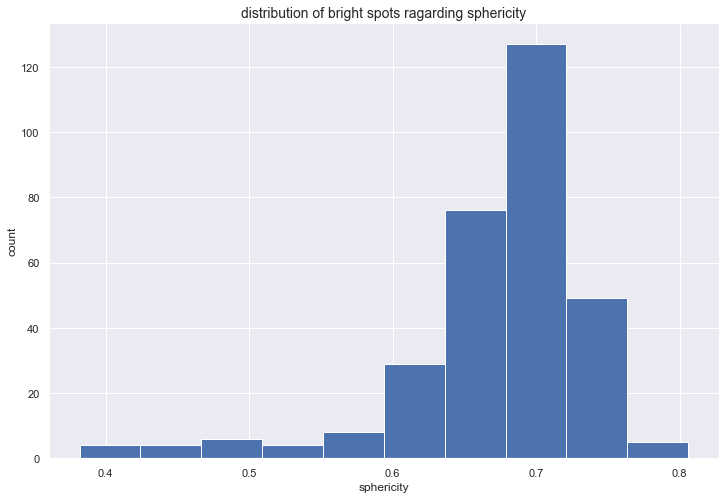

In [143]:
plt.fig = plt.figure(figsize=(12,8))
plt.hist(bright['sphericity'])
plt.xlabel("sphericity")
plt.ylabel("count")
plt.title("distribution of bright spots ragarding sphericity", {'size':14})
plt.show()

In [144]:
bright.head()

,Volume3d (mm^3),BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,VoxelFaceArea,sphericity
0,0.007224,0.000007,0.000007,0.000007,0.974847,0.026112,0.963270,0.473316,0.381831
1,0.005432,0.000005,0.000005,0.000005,0.894271,0.360805,0.293036,0.304069,0.491453
2,0.004183,0.000004,0.000004,0.000004,0.982126,0.782647,0.022838,0.309806,0.405221
3,0.003205,0.000003,0.000003,0.000003,0.563716,0.898917,0.485344,0.172115,0.610760
4,0.002825,0.000003,0.000003,0.000003,0.984450,0.044017,0.353264,0.200801,0.481235


In [145]:
bright.shape

(312, 9)

### grouping particles based on the same volume

In [146]:
group_tab = bright.groupby('Volume3d (mm^3) ').mean('sphericity')
group_tab

,BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,VoxelFaceArea,sphericity
Volume3d (mm^3),,,,,,,,
0.000109,1.086389e-07,1.086389e-07,1.086389e-07,1.000000,0.028861,1.308600e-13,0.017212,0.639719
0.000163,1.629583e-07,1.629583e-07,1.629583e-07,0.970731,0.341395,1.290931e-01,0.020376,0.709256
0.000217,2.172778e-07,2.172778e-07,2.172778e-07,0.929173,0.743835,1.124901e-01,0.024407,0.719946
0.000272,2.715972e-07,2.715972e-07,2.715972e-07,0.826558,0.463312,3.488835e-01,0.029961,0.680583
0.000326,3.259167e-07,3.259167e-07,3.259167e-07,0.777028,0.527402,4.098361e-01,0.033849,0.679537
0.000380,3.802361e-07,3.802361e-07,3.802361e-07,0.839380,0.450544,3.786736e-01,0.036973,0.686930
0.000435,4.345556e-07,4.345556e-07,4.345556e-07,0.678199,0.564969,5.645434e-01,0.040160,0.699900
0.000489,4.888750e-07,4.888750e-07,4.888750e-07,0.799222,0.569044,3.387697e-01,0.048766,0.620827
0.000543,5.431945e-07,5.431945e-07,5.431945e-07,0.807196,0.461044,4.301568e-01,0.050487,0.644927


In [147]:
sphericity_for_groups = group_tab['sphericity'].values
p= bright['Volume3d (mm^3) '].value_counts()
freq_table = pd.DataFrame({"Volume3d (mm^3)": p.index, "frequency": p.values}).set_index("Volume3d (mm^3)")
freq_table['frequency [%]'] = freq_table.apply(lambda x: round((x/312)*100,2)) 
freq_table['sphericity mean'] = sphericity_for_groups
freq_table

,frequency,frequency [%],sphericity mean
Volume3d (mm^3),,,
0.000163,97,31.09,0.639719
0.000217,59,18.91,0.709256
0.000272,36,11.54,0.719946
0.000326,30,9.62,0.680583
0.000543,15,4.81,0.679537
0.000435,14,4.49,0.686930
0.000109,11,3.53,0.699900
0.000380,9,2.88,0.620827
0.000489,6,1.92,0.644927


In [148]:
group_tab['count'] = freq_table['frequency']

In [149]:
group_tab.head()

,BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,VoxelFaceArea,sphericity,count
Volume3d (mm^3),,,,,,,,,
0.000109,1.086389e-07,1.086389e-07,1.086389e-07,1.000000,0.028861,1.308600e-13,0.017212,0.639719,11
0.000163,1.629583e-07,1.629583e-07,1.629583e-07,0.970731,0.341395,1.290931e-01,0.020376,0.709256,97
0.000217,2.172778e-07,2.172778e-07,2.172778e-07,0.929173,0.743835,1.124901e-01,0.024407,0.719946,59
0.000272,2.715972e-07,2.715972e-07,2.715972e-07,0.826558,0.463312,3.488835e-01,0.029961,0.680583,36
0.000326,3.259167e-07,3.259167e-07,3.259167e-07,0.777028,0.527402,4.098361e-01,0.033849,0.679537,30


In [154]:
group_tab

,BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,VoxelFaceArea,sphericity,count
Volume3d (mm^3),,,,,,,,,
0.000109,1.086389e-07,1.086389e-07,1.086389e-07,1.000000,0.028861,1.308600e-13,0.017212,0.639719,11
0.000163,1.629583e-07,1.629583e-07,1.629583e-07,0.970731,0.341395,1.290931e-01,0.020376,0.709256,97
0.000217,2.172778e-07,2.172778e-07,2.172778e-07,0.929173,0.743835,1.124901e-01,0.024407,0.719946,59
0.000272,2.715972e-07,2.715972e-07,2.715972e-07,0.826558,0.463312,3.488835e-01,0.029961,0.680583,36
0.000326,3.259167e-07,3.259167e-07,3.259167e-07,0.777028,0.527402,4.098361e-01,0.033849,0.679537,30
0.000380,3.802361e-07,3.802361e-07,3.802361e-07,0.839380,0.450544,3.786736e-01,0.036973,0.686930,9
0.000435,4.345556e-07,4.345556e-07,4.345556e-07,0.678199,0.564969,5.645434e-01,0.040160,0.699900,14
0.000489,4.888750e-07,4.888750e-07,4.888750e-07,0.799222,0.569044,3.387697e-01,0.048766,0.620827,6
0.000543,5.431945e-07,5.431945e-07,5.431945e-07,0.807196,0.461044,4.301568e-01,0.050487,0.644927,15


In [152]:
val_delete

0.0001086389

### deleting values with anisotropy equal to 1

In [156]:
bright = bright[bright['Volume3d (mm^3) '] != val_delete]

In [157]:
bright.count()

Volume3d (mm^3)      301
BaryCenterX (mm)     301
BaryCenterY (mm)     301
BaryCenterZ (mm)     301
Anisotropy           301
Elongation           301
Flatness             301
VoxelFaceArea        301
sphericity           301
dtype: int64

In [105]:
bright.count()

Volume3d (mm^3)      301
BaryCenterX (mm)     301
BaryCenterY (mm)     301
BaryCenterZ (mm)     301
Anisotropy           301
Elongation           301
Flatness             301
VoxelFaceArea        301
sphericity           301
dtype: int64

### after deleting all obvious error values - we have 301 bright spots

### mean and std of sphericity

In [169]:
mean_sphericity = bright['sphericity'].mean()
print("mean is: ",mean_sphericity)
std_sphericity = bright['sphericity'].std()
sample_size = bright.shape[0]


z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

#pop_stdev = population_ages.std()  # Get the population standard deviation

margin_of_error = z_critical * (std_sphericity/math.sqrt(sample_size))

confidence_interval = (mean_sphericity - margin_of_error,
                       mean_sphericity + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)


mean is:  0.6824787027531167
z-critical value:
1.959963984540054
Confidence interval:
(0.6742862649580207, 0.6906711405482128)


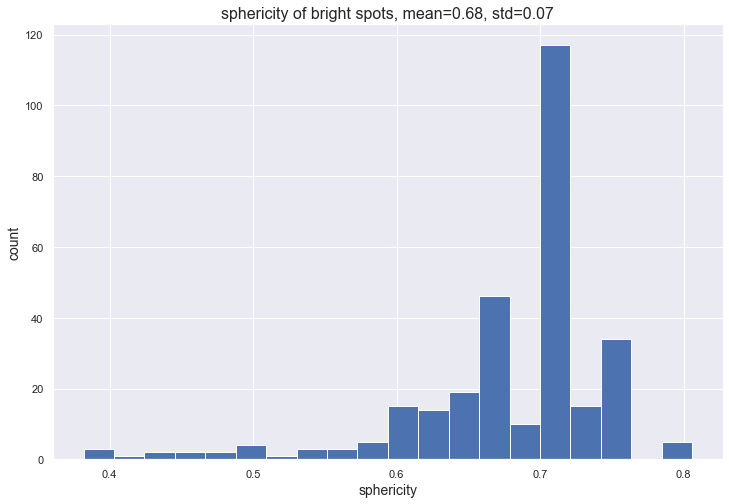

In [166]:
fig = plt.figure(figsize=(12,8))
plt.hist(bright['sphericity'], bins=20)
plt.title(f"sphericity of bright spots, mean={round(mean_sphericity,2)}, std={round(std_sphericity,2)}", {'size':16})
plt.xlabel("sphericity", {'size':14})
plt.ylabel("count", {'size':14})
plt.show()

### (sphericity of bright spots) KDE: bandwith=0.1, kernel=gaussian. 
### Bandwith was selected using Siverman's rule

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KernelDensity
import numpy as np
from KDEpy import FFTKDE

bandwidths = 10 ** np.linspace(-1, 1, 20)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(np.array(bright['sphericity']).reshape(-1,1));

In [109]:
grid.best_params_

{'bandwidth': 0.1}

C:\Users\hamro\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.



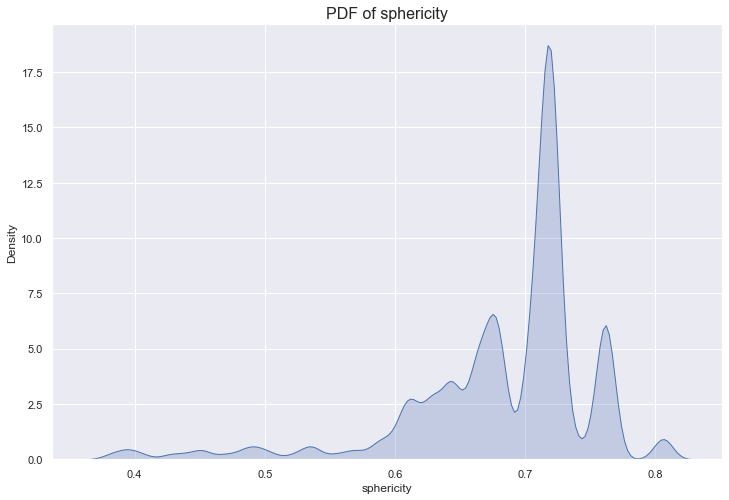

In [110]:
fig = plt.figure(figsize=(12,8))
plt.title("PDF of sphericity", {'size':16})
sns.kdeplot(bright['sphericity'], bw=0.1, shade=True)
plt.show()

C:\Users\hamro\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.



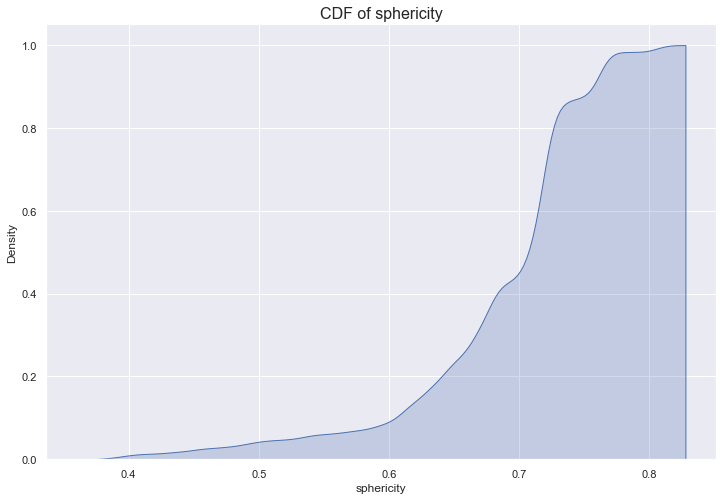

In [111]:
fig = plt.figure(figsize=(12,8))
plt.title("CDF of sphericity", {'size':16})
sns.kdeplot(bright['sphericity'], bw=0.1, shade=True, cumulative=True)
plt.show()

In [214]:
bright.head()

,Volume3d (mm^3),BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,VoxelFaceArea,sphericity
667,0.007224,0.000007,0.000007,0.000007,0.974847,0.026112,0.963270,0.473316,0.381831
204,0.005432,0.000005,0.000005,0.000005,0.894271,0.360805,0.293036,0.304069,0.491453
932,0.004183,0.000004,0.000004,0.000004,0.982126,0.782647,0.022838,0.309806,0.405221
69,0.003205,0.000003,0.000003,0.000003,0.563716,0.898917,0.485344,0.172115,0.610760
478,0.002825,0.000003,0.000003,0.000003,0.984450,0.044017,0.353264,0.200801,0.481235


In [153]:
corr = np.corrcoef(x=bright.index,y=bright['sphericity'])[0][1]

### sphericity vs volume correlation

In [215]:
corr = np.corrcoef(x=bright.index,y=bright['sphericity'])[0][1]

C:\Users\hamro\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



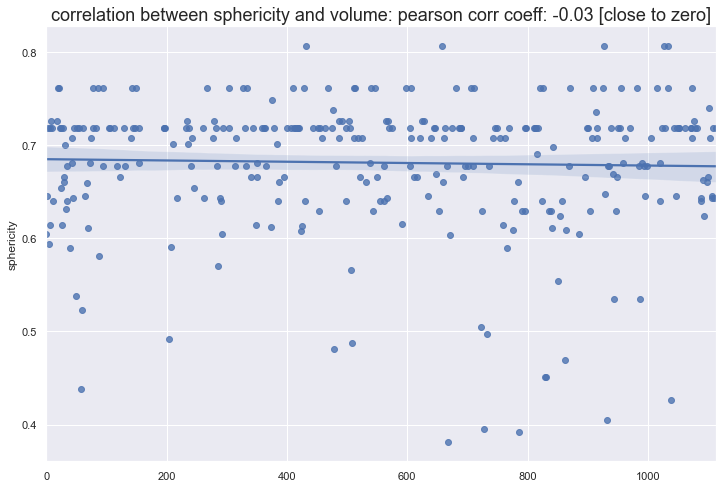

In [219]:
fig = plt.figure(figsize=(12,8))
sns.regplot(bright.index, bright['sphericity'])
plt.title(f"correlation between sphericity and volume: pearson corr coeff: {round(corr,2)} [close to zero]", {'size': 18})
plt.show()